In [22]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
import os
os.listdir('../Files/')

['LC08_L1TP_226087_20191005_20191018_01_T1.tar.gz',
 'LC08_L1TP_226087_20191005_20191018_01_T1_ANG.txt',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B1.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B10.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B11.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B2.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B3.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B4.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B5.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B6.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B7.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B8.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B9.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_BQA.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_MTL.txt',
 'LC08_L1TP_226087_20191005_NDVI.tiff']

In [35]:
band4 = rasterio.open('../Files/LC08_L1TP_226087_20191005_20191018_01_T1_B4.TIF') #Red
band5 = rasterio.open('../Files/LC08_L1TP_226087_20191005_20191018_01_T1_B5.TIF') #NIR
print(band4.height)
print(band4.width)
print(band4.dtypes[0])
print(band4.crs)
print()
print(band4.transform)
print()
print(band4.read(1))

7921
7891
uint16
EPSG:32620

| 30.00, 0.00, 506685.00|
| 0.00,-30.00,-4188585.00|
| 0.00, 0.00, 1.00|

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


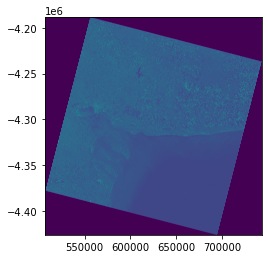

<AxesSubplot:>

In [25]:
plot.show(band4)

In [15]:
# En python 2, si dividis entre integers, el resultado va a ser integer, por eso transforma a float.
# Aca tengo python 3, asiq voy a probar hacerlo directo con integers.
# Eso es con numeros en python. Trabajando con Rasters en rasterio, si dividimos integers, el resultado va a ser integer. El NDVI es una fraccion, de manera que necesitamos que sea float

In [36]:
red = band4.read(1).astype('float32')
nir = band5.read(1).astype('float32')

In [40]:
ndvi = np.where(
    (nir+red)==0.,
    0,
    (nir-red)/(nir+red)
)

In [41]:
ndviImage = rasterio.open('../Files/LC08_L1TP_226087_20191005_NDVI.tiff','w',
                        driver='Gtiff',
                        width=band4.width,
                        height=band4.height,
                        count=1, # Nº of bands
                        crs=band4.crs,
                        transform=band4.transform,
                        dtype='float32'
                        )
ndviImage.write(ndvi,1) # aca le da el contenido al archivo creado en raterio.open
ndviImage.close()

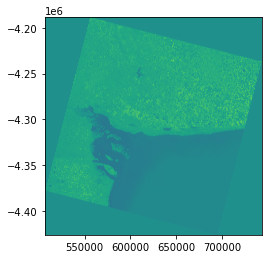

<AxesSubplot:>

In [42]:
ndviImage = rasterio.open('../Files/LC08_L1TP_226087_20191005_NDVI.tiff')
plot.show(ndviImage)